In [1]:
#All imports needed to this project:

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
#Creating the train dataset and validation dataset:

image_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.3)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='../input/blood-cells-image-dataset/bloodcells_dataset',
                                                 target_size=(300, 300),  
                                                 subset="training",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                 )

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='../input/blood-cells-image-dataset/bloodcells_dataset',
                                                 target_size=(300, 300), 
                                                 subset="validation",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                )
                                                

Found 11967 images belonging to 8 classes.
Found 5125 images belonging to 8 classes.


In [3]:
#dictionary to know what type of cell is with argmax
argmax_to_string = {
                     0: 'basophil',
                     1: 'eosinophil',
                     2: 'erythroblast',
                     3: 'immunoglobulin',
                     4: 'lymphocyte',
                     5: 'monocyte',
                     6: 'neutrophil',
                     7: 'platelet'
                   }

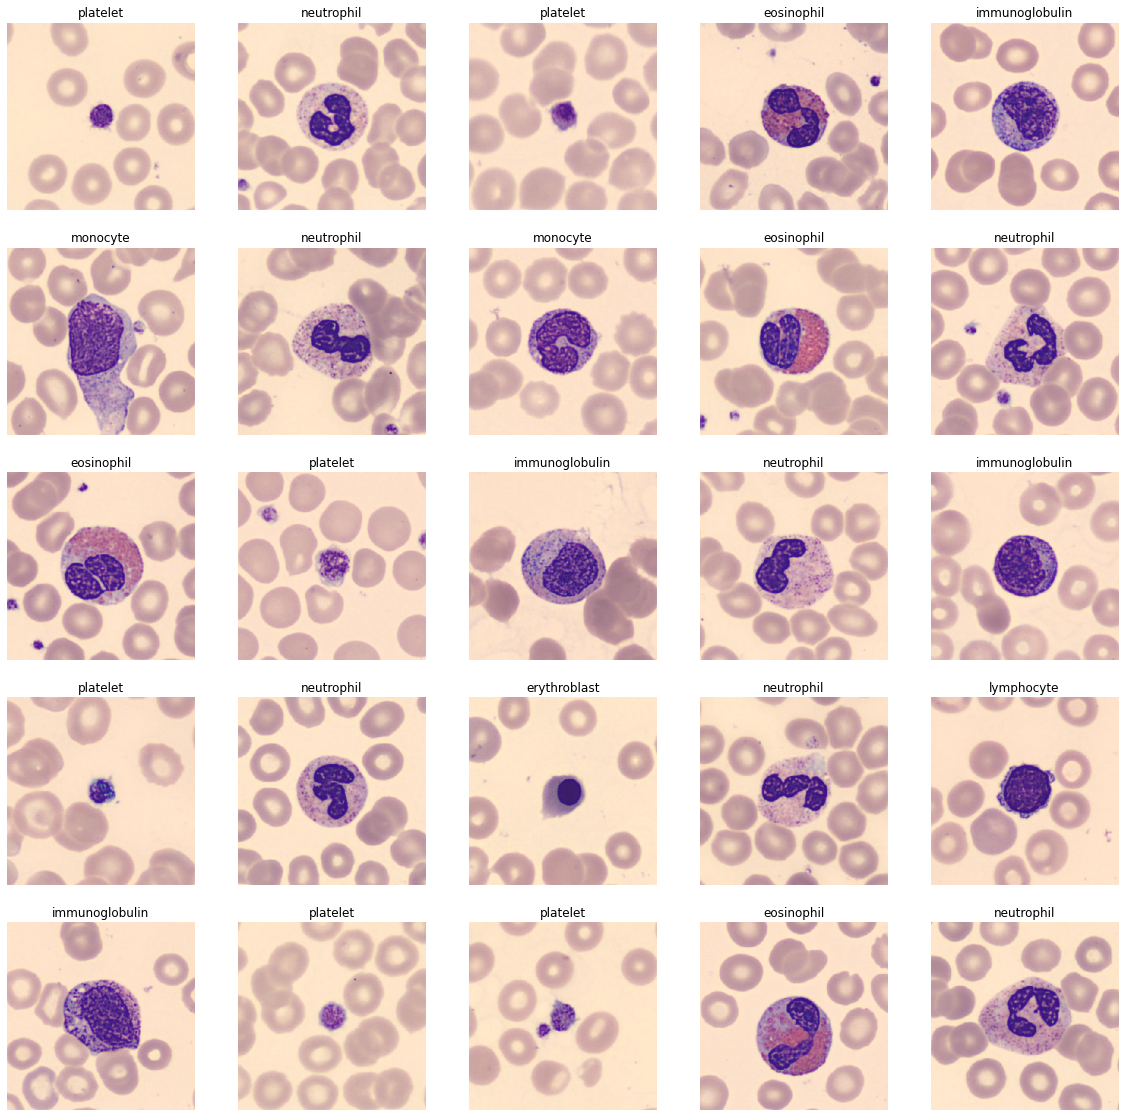

In [4]:
#Seeing how data is

plt.figure(figsize=(20, 20))
plot_dim = 5
counter = 1

for img in train_dataset:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) # only one image of (plot_dim²)th firsts batchs
    plt.title(argmax_to_string[np.argmax(img[-1])])
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1

**What is blood and how is the function of the cells on this dataset?**

*Blood* is a fluid-shaped tissue, present in humans, with several functions, including nutrient transport, gas transport, body temperature regulation, aid in protection against pathogenic microorganisms, and many other functions. For each of these studies, there are specialized cells in certain objectives. Among those in the dataset: 

*Basophil*: A subtype of white blood cell (blood defense cells), which aims to release Histamine and Heparin when necessary. They are about 1.5% of the total white blood cells, appearing between 0 to 200 basophils per cubic millimeter of blood in a healthy person. Eosinophils: Another subtype of blood defense cell, are numerous when there is presence of some infection. They range from about 1 to 5% of blood defense cells and, in healthy people, they are between 40,000 and 500,000 cells per milliliter of blood.

*Eosinophil*: Another subtype of blood defense cell, are numerous when there is presence of some infection. They range from about 1 to 5% of blood defense cells and, in healthy people, they are between 40,000 and 500,000 cells per milliliter of blood. 

*Erythroblast*: Among those present, it is the only cell that is not part of white blood cells. Such, cells that give rise to erythrocytes, which have the function of transporting gases in the blood. They are very numerous and appear between 3.8 million and 5.2 million units per milliliter of blood.

*IG (immunoglobins)*: They are glycoprotein molecules produced by plasmocytes to respond to some specific type of imunogen and function as antibodies. Its purpose is to bind to some specific antigen to ensure protection of an organism. 
Lymphocytes: Another specific type of white blood cells, therefore have a defense function in the body. Among the types of lymphophytes there are type T, B and NK cells. Its concentration may indicate infections (at times of discharge) or indicate diseases such as anemia and leukemia (at times of low). There are usually about 1500 to 3000 cells per cubic millimeter of blood.

*Monocyte*: Another defense cell. Its main characteristic is the small life cycle and its great differentiation to act in different parts of the body (liver, nervous system, epidermis, etc. High monocytes may indicate diseases such as ulcerative colitis, leukemia, and some autoimmune diseases, while at low times may indicate bone marrow problems, HPV, or other comorbidities. They represent about 2 to 10% of the total leukocytes and range between 300 and 900 units per cubic millimeter. 

*Neutrophil*: Known as polymorphonuclear leukocytes, they are a very numerous type of cell present in white blood cells, with the aim of defending the individual from infections caused by different types of viruses and bacteria, as they have a high capacity to perform phagocytosis (a process in which a cell encompasses solid particles). In general, about 2300 to 8100 cubic millimetres are present.

*Platelet*: Small fragments of a cell type called megakaryocyte and has the main function of clotting the blood to prevent major bleeding. Generally, about 150,000 to 450,000 cubic millimetres of blood are present. Values above may indicate thrombocytosis, bone marrow changes, or hemolytic anemias. While in low-supple situations, they may indicate infectious diseases, nutritional deficiencies or spleen problems.


**why is it useful to recognize different types of cells with computer vision?**

Recognizing and differentiating different cell types in the blood can help health professionals optimize work routines, automate steamy tasks, and automatically detect the possibility of some disease


References:
Junqueira's Basic Histology Text and Atlas, 14th Edition
https://www.tuasaude.com/ (portuguese)
https://escolaeducacao.com.br/ (portuguese)



In [5]:
#Creating a deep learning model with keras.

model = keras.models.Sequential()
model.add(keras.Input(shape=(300, 300, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (300, 300, 3)))
model.add(keras.layers.MaxPooling2D(2, padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(8, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2022-07-20 18:15:59.537191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                46080064  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 46,085,640
Trainable params: 46,085,640
Non-trainable params: 0
____________________________________________

2022-07-20 18:15:59.636997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 18:15:59.637887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 18:15:59.639220: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-20 18:15:59.639516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [6]:
#Training the model with 15 iterations
model.fit(train_dataset, epochs=15, validation_data=validation_dataset)

2022-07-20 18:16:02.373005: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-07-20 18:16:04.035372: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


374/374 [==============================] - 193s 498ms/step - loss: 3.4576 - accuracy: 0.5847 - val_loss: 0.7516 - val_accuracy: 0.7241
Epoch 2/15
374/374 [==============================] - 89s 239ms/step - loss: 0.5617 - accuracy: 0.8027 - val_loss: 0.6392 - val_accuracy: 0.7688
Epoch 3/15
374/374 [==============================] - 90s 240ms/step - loss: 0.4142 - accuracy: 0.8515 - val_loss: 0.6266 - val_accuracy: 0.7733
Epoch 4/15
374/374 [==============================] - 90s 240ms/step - loss: 0.3397 - accuracy: 0.8774 - val_loss: 0.6343 - val_accuracy: 0.7635
Epoch 5/15
374/374 [==============================] - 89s 238ms/step - loss: 0.2931 - accuracy: 0.8981 - val_loss: 0.5006 - val_accuracy: 0.8217
Epoch 6/15
374/374 [==============================] - 90s 240ms/step - loss: 0.2291 - accuracy: 0.9200 - val_loss: 0.5493 - val_accuracy: 0.8162
Epoch 7/15
374/374 [==============================] - 86s 230ms/step - loss: 0.1938 - accuracy: 0.9343 - val_loss: 0.6828 - val_accuracy: 0.

In [7]:
#mins and max values from the training:

min_loss_train = min(model.history.history['loss'])
min_loss_val = min(model.history.history['val_loss'])
                
max_accuracy_train = max(model.history.history['accuracy'])
max_accuracy_val = max(model.history.history['val_accuracy'])


print('Mininum of loss value from training dataset: ', round(min_loss_train, 4))
print('Mininum of loss value from validation dataset: ', round(min_loss_val, 4))
print()
print('Max accuracy from training dataset: ', round(max_accuracy_train*100, 2), '%')
print('Max accuracy from training dataset: ', round(max_accuracy_val*100, 2), '%')

Mininum of loss value from training dataset:  0.0584
Mininum of loss value from validation dataset:  0.4778

Max accuracy from training dataset:  98.26 %
Max accuracy from training dataset:  85.21 %


Text(0, 0.5, 'Loss function value')

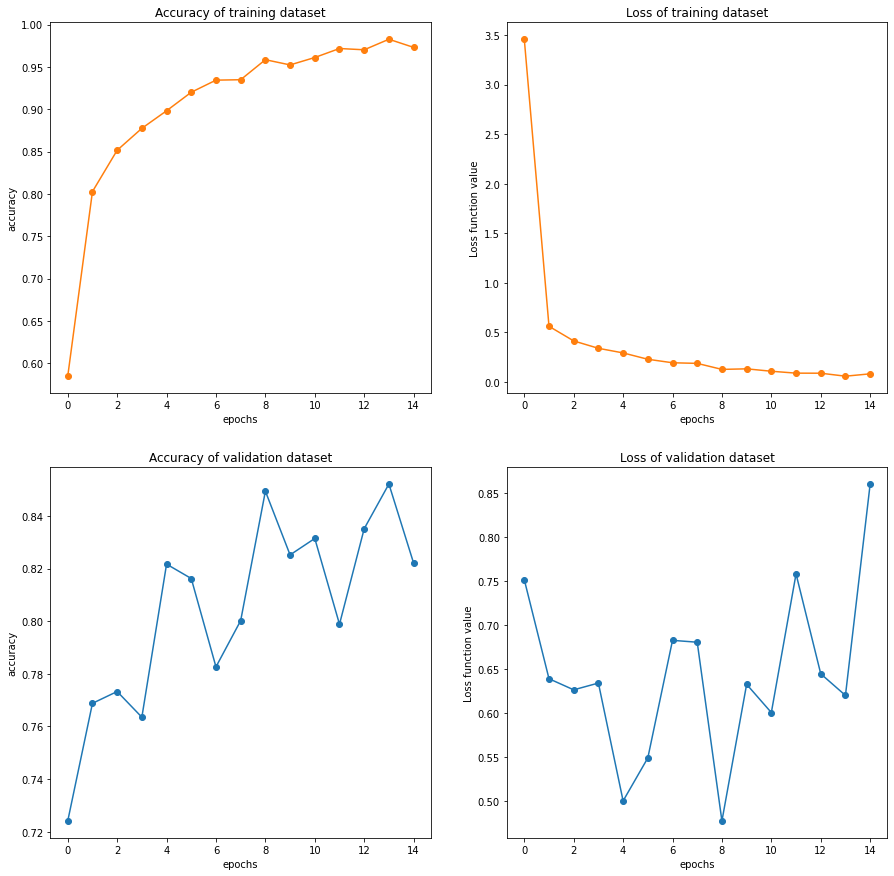

In [8]:
#Development of training:

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['accuracy'], color='tab:orange', marker='o')
plt.title('Accuracy of training dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['loss'], color='tab:orange', marker='o')
plt.title('Loss of training dataset')
plt.xlabel('epochs')
plt.ylabel('Loss function value')

plt.subplot(2, 2, 3)
plt.plot(model.history.history['val_accuracy'], color='tab:blue', marker='o')
plt.title('Accuracy of validation dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(2, 2, 4)
plt.plot(model.history.history['val_loss'], color='tab:blue', marker='o')
plt.title('Loss of validation dataset')
plt.xlabel('epochs')
plt.ylabel('Loss function value')


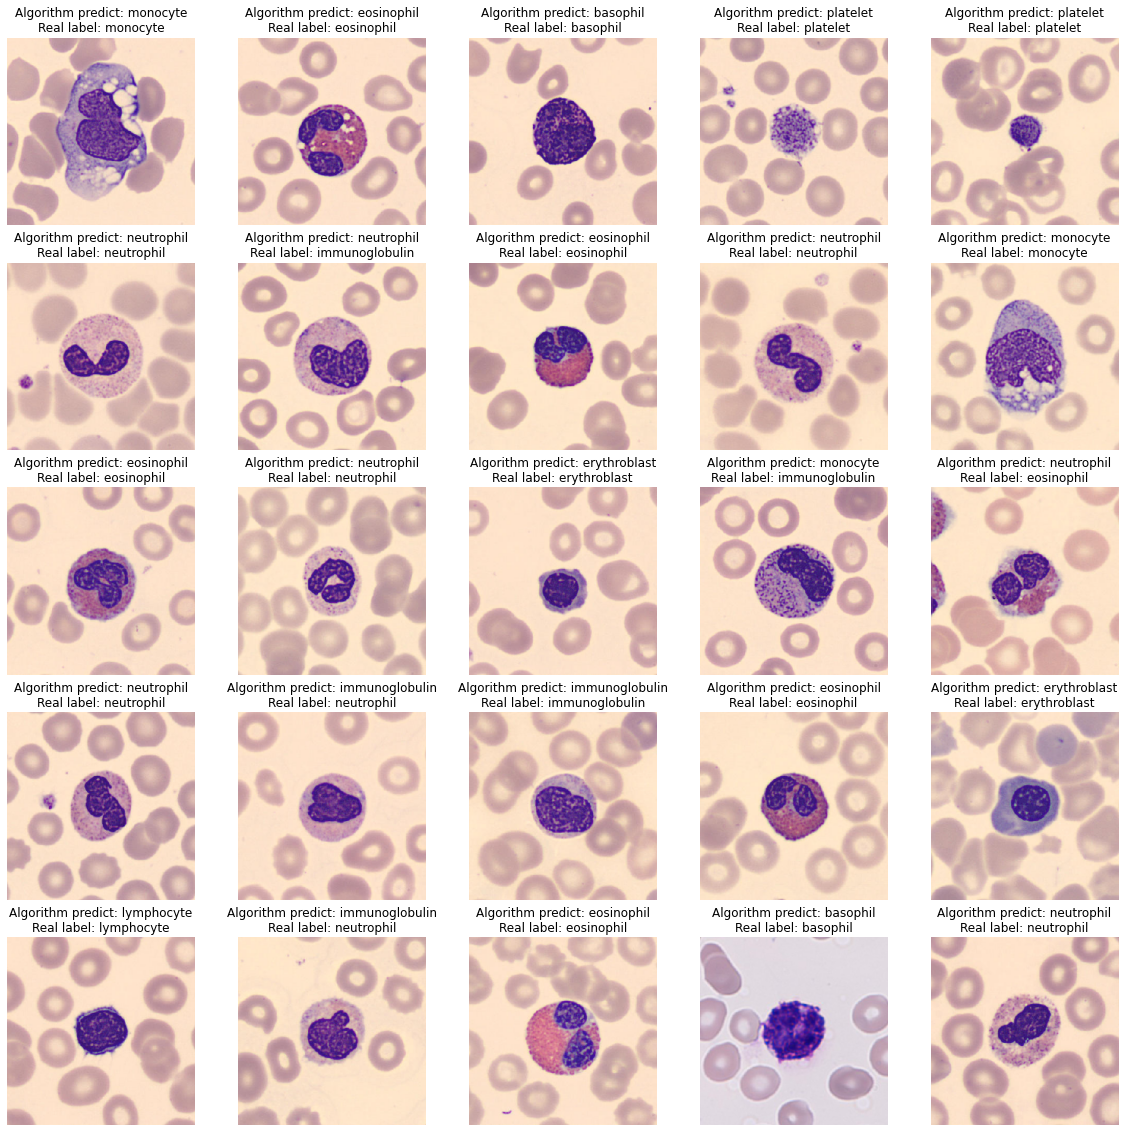

In [9]:
#Seeing the results:

plt.figure(figsize=(20, 20))
plot_dim = 5
counter = 1

for img in validation_dataset:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) # only one image of (plot_dim*plot_dim)th firsts batchs
    predict = argmax_to_string[np.argmax(model.predict(img[0])[0])]
    real_label = argmax_to_string[np.argmax(img[-1])]

    plt.title(f'Algorithm predict: {predict}\nReal label: {real_label}')
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1